## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.031584 -0.307272  1.297106 -0.850895 -1.330359 -0.490616
1 -1.466384 -0.822651 -0.315840 -0.464775 -0.739288 -1.801922
2  1.389554 -0.889479  0.033060 -0.135980 -0.640011 -0.481011
3 -0.275148  0.653299  0.359075  0.021991 -0.696632  0.039101
4  1.020084  0.619720  0.543031 -0.909536  0.962188  0.629698


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0054035	total: 68.8ms	remaining: 1m 8s
1:	learn: 0.9951180	total: 69.2ms	remaining: 34.6s
2:	learn: 0.9841911	total: 70.2ms	remaining: 23.3s
3:	learn: 0.9729366	total: 70.7ms	remaining: 17.6s
4:	learn: 0.9635029	total: 71.3ms	remaining: 14.2s
5:	learn: 0.9542118	total: 71.8ms	remaining: 11.9s
6:	learn: 0.9443357	total: 72.4ms	remaining: 10.3s
7:	learn: 0.9342997	total: 72.8ms	remaining: 9.03s
8:	learn: 0.9260631	total: 73.2ms	remaining: 8.06s
9:	learn: 0.9165090	total: 73.6ms	remaining: 7.29s
10:	learn: 0.9084306	total: 74.1ms	remaining: 6.66s
11:	learn: 0.8979892	total: 74.6ms	remaining: 6.14s
12:	learn: 0.8889786	total: 75.2ms	remaining: 5.71s
13:	learn: 0.8799303	total: 75.6ms	remaining: 5.32s
14:	learn: 0.8728249	total: 76.1ms	remaining: 5s
15:	learn: 0.8654394	total: 76.7ms	remaining: 4.71s
16:	learn: 0.8575318	total: 77.1ms	remaining: 4.46s
17:	learn: 0.8494201	total: 77.5ms	remaining: 4.23s
18:	learn: 0.8410322	total: 78ms	remaining: 4.0

86:	learn: 0.4821695	total: 109ms	remaining: 1.14s
87:	learn: 0.4790582	total: 109ms	remaining: 1.13s
88:	learn: 0.4760765	total: 110ms	remaining: 1.13s
89:	learn: 0.4728544	total: 110ms	remaining: 1.12s
90:	learn: 0.4695258	total: 111ms	remaining: 1.11s
91:	learn: 0.4655444	total: 111ms	remaining: 1.1s
92:	learn: 0.4623459	total: 112ms	remaining: 1.09s
93:	learn: 0.4585785	total: 112ms	remaining: 1.08s
94:	learn: 0.4555041	total: 113ms	remaining: 1.07s
95:	learn: 0.4521612	total: 113ms	remaining: 1.07s
96:	learn: 0.4492563	total: 114ms	remaining: 1.06s
97:	learn: 0.4471295	total: 114ms	remaining: 1.05s
98:	learn: 0.4441798	total: 115ms	remaining: 1.04s
99:	learn: 0.4407937	total: 115ms	remaining: 1.04s
100:	learn: 0.4385030	total: 116ms	remaining: 1.03s
101:	learn: 0.4354887	total: 116ms	remaining: 1.02s
102:	learn: 0.4324747	total: 116ms	remaining: 1.01s
103:	learn: 0.4287807	total: 117ms	remaining: 1s
104:	learn: 0.4259363	total: 117ms	remaining: 997ms
105:	learn: 0.4229434	total: 1

258:	learn: 0.1538690	total: 187ms	remaining: 536ms
259:	learn: 0.1526963	total: 188ms	remaining: 535ms
260:	learn: 0.1518942	total: 188ms	remaining: 533ms
261:	learn: 0.1506328	total: 189ms	remaining: 532ms
262:	learn: 0.1496267	total: 189ms	remaining: 530ms
263:	learn: 0.1488016	total: 189ms	remaining: 528ms
264:	learn: 0.1477438	total: 190ms	remaining: 527ms
265:	learn: 0.1465573	total: 190ms	remaining: 525ms
266:	learn: 0.1456938	total: 191ms	remaining: 524ms
267:	learn: 0.1445395	total: 192ms	remaining: 523ms
268:	learn: 0.1435378	total: 192ms	remaining: 522ms
269:	learn: 0.1425584	total: 192ms	remaining: 520ms
270:	learn: 0.1418326	total: 193ms	remaining: 519ms
271:	learn: 0.1408033	total: 194ms	remaining: 518ms
272:	learn: 0.1399427	total: 194ms	remaining: 517ms
273:	learn: 0.1390134	total: 195ms	remaining: 516ms
274:	learn: 0.1381743	total: 195ms	remaining: 515ms
275:	learn: 0.1372567	total: 196ms	remaining: 513ms
276:	learn: 0.1364565	total: 196ms	remaining: 512ms
277:	learn: 

478:	learn: 0.0422467	total: 292ms	remaining: 318ms
479:	learn: 0.0419973	total: 293ms	remaining: 317ms
480:	learn: 0.0418523	total: 293ms	remaining: 316ms
481:	learn: 0.0416383	total: 294ms	remaining: 316ms
482:	learn: 0.0413954	total: 294ms	remaining: 315ms
483:	learn: 0.0411160	total: 295ms	remaining: 314ms
484:	learn: 0.0409213	total: 295ms	remaining: 313ms
485:	learn: 0.0408183	total: 295ms	remaining: 312ms
486:	learn: 0.0406516	total: 296ms	remaining: 312ms
487:	learn: 0.0404199	total: 296ms	remaining: 311ms
488:	learn: 0.0401832	total: 297ms	remaining: 310ms
489:	learn: 0.0398992	total: 297ms	remaining: 309ms
490:	learn: 0.0398005	total: 297ms	remaining: 308ms
491:	learn: 0.0396394	total: 298ms	remaining: 307ms
492:	learn: 0.0394142	total: 298ms	remaining: 307ms
493:	learn: 0.0392579	total: 299ms	remaining: 306ms
494:	learn: 0.0390723	total: 299ms	remaining: 305ms
495:	learn: 0.0388453	total: 300ms	remaining: 305ms
496:	learn: 0.0385739	total: 300ms	remaining: 304ms
497:	learn: 

646:	learn: 0.0221829	total: 370ms	remaining: 202ms
647:	learn: 0.0221146	total: 371ms	remaining: 201ms
648:	learn: 0.0220290	total: 371ms	remaining: 201ms
649:	learn: 0.0219168	total: 372ms	remaining: 200ms
650:	learn: 0.0218192	total: 372ms	remaining: 200ms
651:	learn: 0.0217104	total: 373ms	remaining: 199ms
652:	learn: 0.0216363	total: 374ms	remaining: 199ms
653:	learn: 0.0215305	total: 374ms	remaining: 198ms
654:	learn: 0.0214642	total: 375ms	remaining: 197ms
655:	learn: 0.0213593	total: 375ms	remaining: 197ms
656:	learn: 0.0212566	total: 376ms	remaining: 196ms
657:	learn: 0.0211306	total: 376ms	remaining: 196ms
658:	learn: 0.0210303	total: 377ms	remaining: 195ms
659:	learn: 0.0209346	total: 377ms	remaining: 194ms
660:	learn: 0.0208440	total: 378ms	remaining: 194ms
661:	learn: 0.0207556	total: 378ms	remaining: 193ms
662:	learn: 0.0206797	total: 379ms	remaining: 193ms
663:	learn: 0.0205941	total: 379ms	remaining: 192ms
664:	learn: 0.0205603	total: 380ms	remaining: 191ms
665:	learn: 

865:	learn: 0.0090055	total: 475ms	remaining: 73.5ms
866:	learn: 0.0089535	total: 476ms	remaining: 73ms
867:	learn: 0.0089108	total: 476ms	remaining: 72.4ms
868:	learn: 0.0088602	total: 477ms	remaining: 71.9ms
869:	learn: 0.0088183	total: 477ms	remaining: 71.3ms
870:	learn: 0.0087692	total: 478ms	remaining: 70.7ms
871:	learn: 0.0087282	total: 478ms	remaining: 70.2ms
872:	learn: 0.0086875	total: 479ms	remaining: 69.6ms
873:	learn: 0.0086398	total: 479ms	remaining: 69.1ms
874:	learn: 0.0085933	total: 480ms	remaining: 68.5ms
875:	learn: 0.0085502	total: 480ms	remaining: 68ms
876:	learn: 0.0084992	total: 481ms	remaining: 67.4ms
877:	learn: 0.0084560	total: 481ms	remaining: 66.9ms
878:	learn: 0.0084066	total: 482ms	remaining: 66.3ms
879:	learn: 0.0083679	total: 482ms	remaining: 65.8ms
880:	learn: 0.0083440	total: 483ms	remaining: 65.2ms
881:	learn: 0.0083060	total: 484ms	remaining: 64.7ms
882:	learn: 0.0082617	total: 484ms	remaining: 64.1ms
883:	learn: 0.0082384	total: 485ms	remaining: 63.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

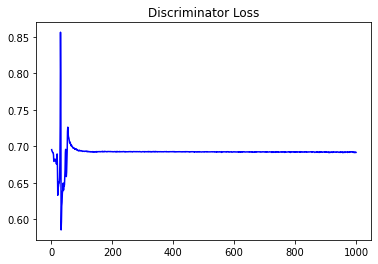

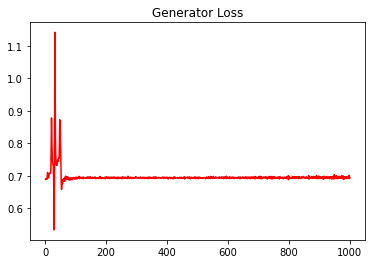

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12162980865790841


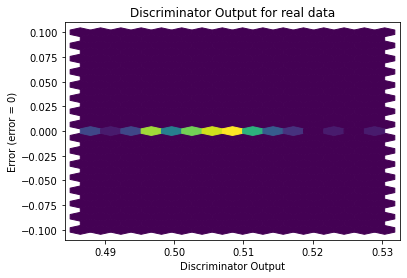

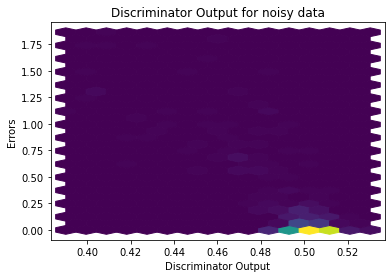

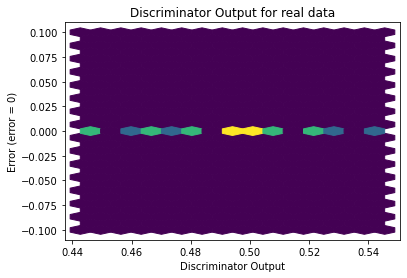

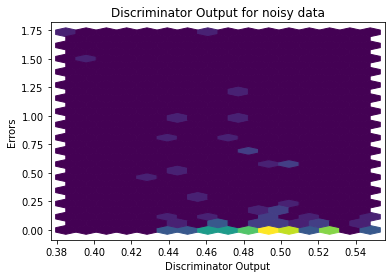

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


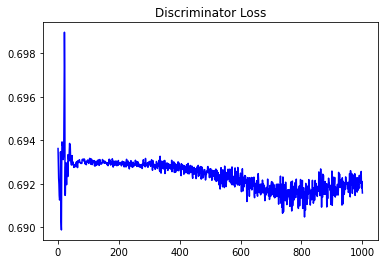

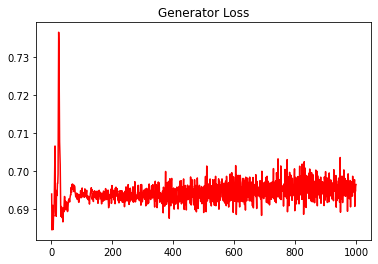

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14775939591751924


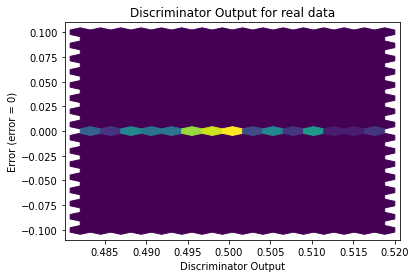

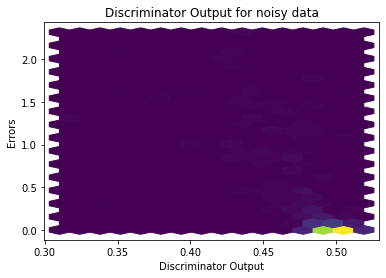

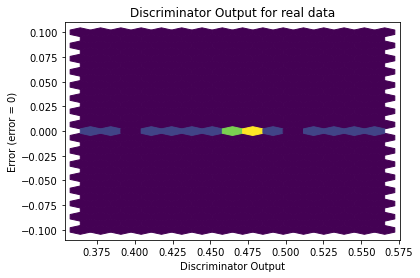

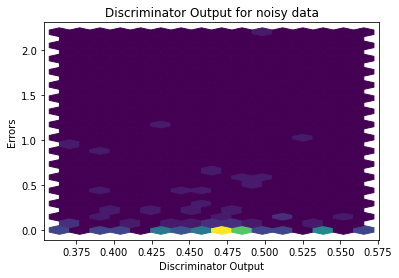

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2797]], requires_grad=True)
